In [1]:
import sys

import cv2
import matplotlib.pyplot as plt
import numpy as np
import pyocr
import pyocr.builders
from PIL import Image

## 1.jpg

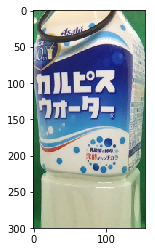

In [2]:
# Show the image

im = Image.open("pyocr-images/1.jpg", "r")
plt.imshow(np.array(im))

plt.show()

In [3]:
# Image to text

tools = pyocr.get_available_tools()
if len(tools) == 0:
    print("No OCR tool found")
    sys.exit(1)

tool = tools[0]
#print("Will use tool '%s'" % (tool.get_name()))

txt = tool.image_to_string(
    Image.open("pyocr-images/1.jpg"),
    lang="jpn+eng",
    builder=pyocr.builders.TextBuilder(tesseract_layout=6)
)
print(txt)

ー 〝・
マ 事
言 上 綱
/翼髑”簾, ,


ー
((8, 29), (87, 69))
〝・
((95, 0), (154, 78))
マ
((3, 83), (89, 115))
事
((128, 96), (150, 124))
言
((9, 122), (83, 150))
上
((81, 121), (114, 150))
綱
((143, 136), (144, 140))
/翼髑”簾,
((11, 176), (117, 209))
,
((138, 206), (140, 208))


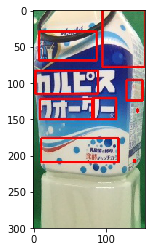

In [4]:
# WordBox

tools = pyocr.get_available_tools()

if len(tools) == 0:
    print("No OCR tool found")
    sys.exit(1)

tool = tools[0]

res = tool.image_to_string(Image.open("pyocr-images/1.jpg"),
                           lang="jpn+eng",
                           builder=pyocr.builders.WordBoxBuilder(tesseract_layout=6))

out = cv2.imread("pyocr-images/1.jpg")
for d in res:
    print(d.content)
    print(d.position)
    cv2.rectangle(out, d.position[0], d.position[1], (0, 0, 255), 2)

# Save the image
cv2.imwrite('pyocr-wordbox/1-wordbox.jpg',out)

# Show the WordBox image
im_wordbox = Image.open("pyocr-wordbox/1-wordbox.jpg", "r")
plt.imshow(np.array(im_wordbox))

plt.show()